# Plots y visualización de los datos

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [59]:
data = pd.read_csv("/Users/WalterAriel/Desktop/datasets/customer-churn-model/Customer Churn Model.txt")

In [60]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [61]:
%matplotlib inline

In [62]:
#savefig('path donde guardar las imagenes.jpeg')

## Scatter Plot

In [63]:
#Cuanto mas cargamos un dispositivo mayor sera el numero de llamadas
#Podemos dibujar un Scatter Plot que relacione las variables 

<AxesSubplot:xlabel='Day Mins', ylabel='Day Charge'>

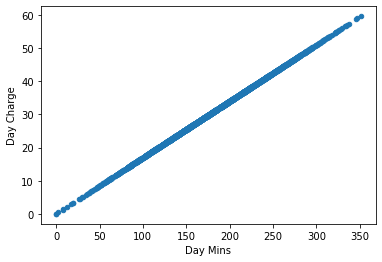

In [64]:
data.plot(kind='scatter', x='Day Mins', y = 'Day Charge')

<AxesSubplot:xlabel='Night Mins', ylabel='Night Charge'>

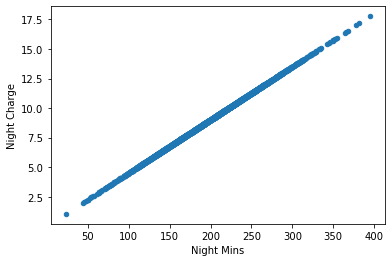

In [65]:
data.plot(kind = 'scatter', x='Night Mins', y='Night Charge')

<AxesSubplot:xlabel='Day Mins', ylabel='Night Charge'>

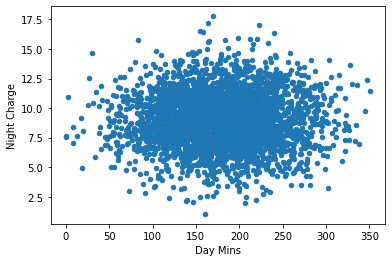

In [66]:
data.plot(kind = 'scatter', x='Day Mins', y='Night Charge')

figure, axs = plt.subplots(2,2, sharey = True, sharex = True)

Nos sirve para crear diagramas

<AxesSubplot:xlabel='Night Calls', ylabel='Night Charge'>

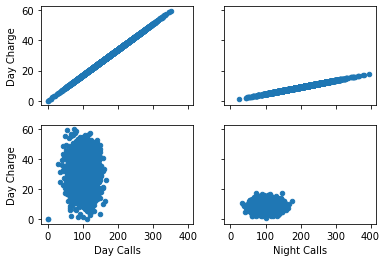

In [67]:
#Ponemos en el primer lugar un scatter
figure, axs = plt.subplots(2,2, sharey = True, sharex = True)
data.plot(kind = 'scatter', x = 'Day Mins', y='Day Charge', ax = axs[0][0]
)
data.plot(kind = 'scatter', x = 'Night Mins', y='Night Charge', ax = axs[0][1]
)

data.plot(kind = 'scatter', x = 'Day Calls', y='Day Charge', ax = axs[1][0]
)
data.plot(kind = 'scatter', x = 'Night Calls', y='Night Charge', ax = axs[1][1]
)




No se parecen los ultimos dos en nada a nivel lineal, el nivel de relacion lineal debe ser 0 o cercano a 0

También se puede ver que de días se hacen muchos mas llamados que de noche

## Histogramas de frecuencias 

(array([2.000e+00, 1.000e+00, 1.900e+01, 1.160e+02, 4.690e+02, 9.170e+02,
        1.055e+03, 5.540e+02, 1.790e+02, 2.100e+01]),
 array([  0. ,  16.5,  33. ,  49.5,  66. ,  82.5,  99. , 115.5, 132. ,
        148.5, 165. ]),
 <BarContainer object of 10 artists>)

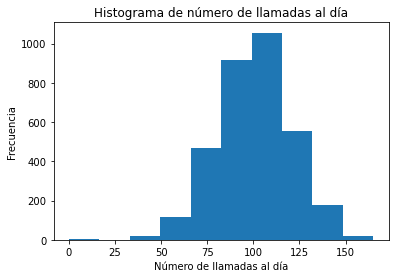

In [81]:
#Podemos añadir etiquetas, en este caso vamos a armar un histograma
#con las llamadas del dia
#plt.hist(data['Day Calls'])

#Podemos especificar el numero de intervalos de particion usando bins
#plt.hist(data['Day Calls'], bins = 20)

#podemos dar los intervalos
#plt.hist(data['Day Calls'], bins = [0,30,60,90,120,150,180])

#Con el xlabel podemos escribir en el eje horizontal y similar con ylabel
plt.xlabel('Número de llamadas al día')
plt.ylabel('Frecuencia')

#Podemos poner un título además
plt.title('Histograma de número de llamadas al día')

#La regla de sturges es la mas utilizada para realizar el histograma de frecuencias
#La cantidad de intervalos segun esto es de 1 + log_2(tamaño de la muestra)
k = int(np.ceil(np.log2(333)))
plt.hist(data['Day Calls'], bins = 1 + k)

#Según el apunte de estadística es recomendable entre 8 y 15 intervalos


## Boxplot, diagrama de caja y bigotes

Text(0.5, 1.0, 'Boxplot de llamadas diarias')

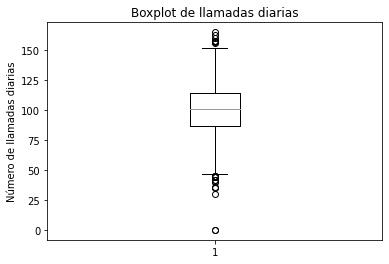

In [84]:
plt.boxplot(data['Day Calls'])
plt.ylabel('Número de llamadas diarias')
plt.title('Boxplot de llamadas diarias')

Los cuantiles siguen para ordenar y dividir donde ser organiza la información la caja comienza con el borde superior donde está el 75 por ciento de los datos y la raya es el 50 porciento o la mediana, el valor
justo en el medio y el 25 por ciento es la linea inferior, la moda es el valor que aparece más frecuentemente en este caso parece estar en torno a 100 y el promedio es la suma de todos los valores divididos el total.

El rango intercuartil es el ancho de la caja es 114-87
Los bigotes se colocan hasta 1.5 veces el rango intercuartil, si ocurre
que hay valores fuera se pintan con circulitos que son los outliers

In [87]:
#Calculamos los estadísticos mas comunes
data['Day Calls'].describe()

count    3333.000000
mean      100.435644
std        20.069084
min         0.000000
25%        87.000000
50%       101.000000
75%       114.000000
max       165.000000
Name: Day Calls, dtype: float64

In [88]:
IQR = data['Day Calls'].quantile(0.75)- data['Day Calls'].quantile(0.25)

In [92]:
#Calculamos el valor del bigote Inferior
data['Day Calls'].quantile(0.25)- 1.5*IQR

46.5

In [93]:
#Calculamos el valor del bigote superior
data['Day Calls'].quantile(0.75) + 1.5*IQR

154.5